<a href="https://colab.research.google.com/github/binit24/FlipRobbo-Assignment./blob/main/Email_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [98]:
#Reading the Dataset:
df = pd.read_csv('messages.csv',encoding='latin1')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(2893, 3)


,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [99]:
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [100]:
#Checking the info:
df.dtypes

subject    object
message    object
label       int64
dtype: object

In [101]:
#Checking the Shape.
print("shape = ::::",df.shape)

shape = :::: (2893, 3)


In [102]:
#Checking Spam and Non Spam Email.
print("non spam and spam counts")
df.label.value_counts()

non spam and spam counts


0    2412
1     481
Name: label, dtype: int64

In [103]:
#Checking the Ratio of Spam and Non Spam
print("Not a Spam Email Ratio i.e. 0 label:",round(len(df[df['label']==0])/len(df['label']),2)*100,"%")
print("Spam Email Ratio that is 1 label:",round(len(df[df['label']==1])/len(df['label']),2)*100,"%")

Not a Spam Email Ratio i.e. 0 label: 83.0 %
Spam Email Ratio that is 1 label: 17.0 %


In [104]:
#Creating the new column for length from message column:
df['length'] = df.message.str.len()
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [105]:
#Reading some messages:
df['message'][5]

'content - length : 4437 call for papers is the best good enough ? workshop on optimality in syntactic theory to be held at the massachusetts institute of technology , cambridge , ma , may 19-21 1995 . syntactic research in a variety of frameworks is assigning a growing role to the notion of comparison . this work , which is at the forefront of current research , includes theories involving principles of economy and optimality . much of this work is still unpublished or in formative stages ( legendre , raymond , and smolensky ( 1993 ) , grimshaw ( 1993 ) , pesetsky ( 1994 ) , chomsky ( 1989 , 1993 , 1994 ) ) . the relevant data vary from one account to another , but empirical comparisons of these proposals now can and should be undertaken . ) from may 19-21 , 1995 , mit will be hosting a workshop to explore and clarify particular issues of syntactic theories in which comparison plays a significant role . the workshop will consist of invited talks and talks selected from anonymously sub

In [106]:
#Text Preprocessing:

In [107]:
#Converting all messages to lower case
df['message'] = df['message'].str.lower()
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [108]:
# Regular Expression
# Replace email addresses with 'email'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')
# Replace URLs with 'webaddress':
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')
# Replace money symbols with 'moneysymb':
df['message'] = df['message'].str.replace(r'£|\$', 'dollars')
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
# Replace numbers with 'number':
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'number')

In [109]:
# Remove punctuation
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')
# Replace whitespace between terms with a single space:
df['message'] = df['message'].str.replace(r'\s+', ' ')
# Remove leading and trailing whitespace:
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [110]:
#Checking the head:
df.head()

,subject,message,label,length
0,job posting - apple-iss research center,content length number apple iss research cente...,0,2856
1,NaN,lang classification grimes joseph e and barbar...,0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas sa...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046


In [111]:
#Removing the stopwords
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
df['message'] = df['message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [112]:
#Creating New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.message.str.len()
df.head()

,subject,message,label,length,clean_length
0,job posting - apple-iss research center,content length number apple iss research cente...,0,2856,2192
1,NaN,lang classification grimes joseph e barbara f ...,0,1800,1475
2,query : letter frequencies for text identifica...,posting inquiry sergei atamas satamas umabnet ...,0,1435,1084
3,risk,colleague researching differing degrees risk p...,0,324,210
4,request book information,earlier morning phone friend mine living south...,0,1046,629


In [113]:
#Total length removal
print("Origional Length:",df.length.sum())
print("Cleaned Length:",df.clean_length.sum())
print("Total Words Removed:",(df.length.sum()) - (df.clean_length.sum()))

Origional Length: 9344743
Cleaned Length: 6851161
Total Words Removed: 2493582


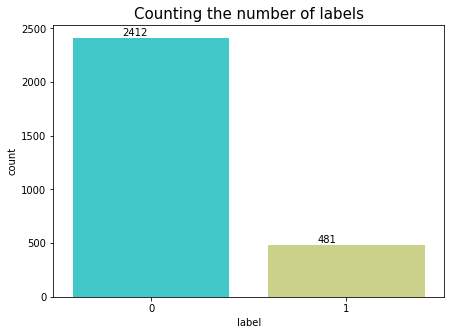

In [114]:
#EDA:
plt.figure(figsize=(7,5))
ax = sns.countplot(df['label'],palette= 'rainbow')
plt.title("Counting the number of labels",fontsize=15)
plt.xticks(rotation='horizontal')
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')
plt.show()

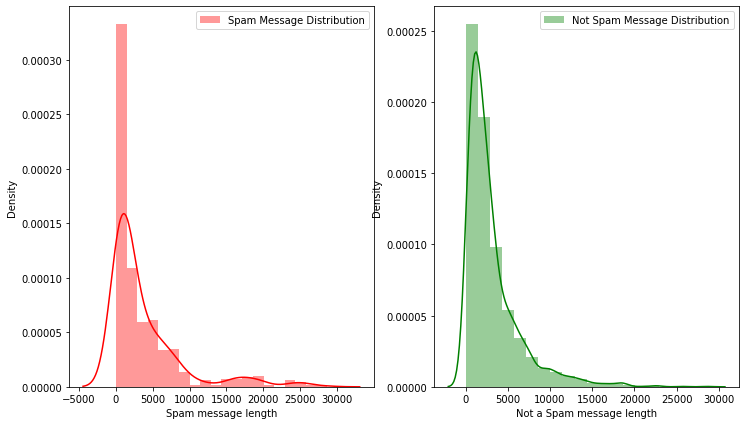

In [115]:
#Message distribution before cleaning
f,ax = plt.subplots(1,2,figsize=(12,7))
sns.distplot(df[df['label']==1]['length'],bins=20, ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()
sns.distplot(df[df['label']==0]['length'],bins=20, ax=ax[1],label='Not Spam Message Distribution',color='g')
ax[1].set_xlabel('Not a Spam message length')
ax[1].legend()
plt.show()

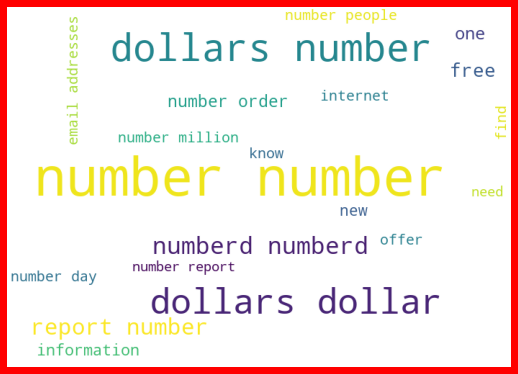

In [116]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud
spams = df['message'][df['label']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=(8,5),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

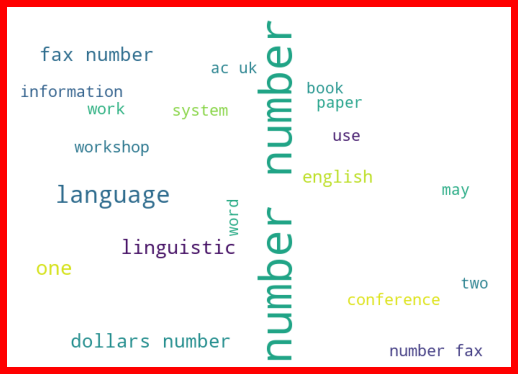

In [117]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud
spams = df['message'][df['label']==0]
spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(spams))
plt.figure(figsize=(8,5),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [118]:
#Converting the text into Vectors using TF-IDF:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(df['message'])

In [119]:
y = df['label']

In [123]:
#Multinomial NB:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
naive = MultinomialNB()
naive.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [124]:
#Making Prediction
y_pred= naive.predict(x_test)

In [125]:
#Printing the Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Accuacy Score
print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.8342541436464088


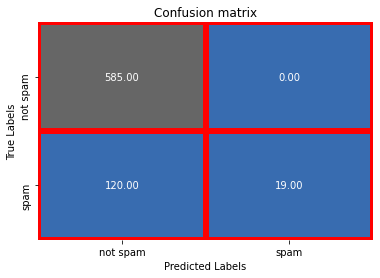

In [126]:
# plot confusion matrix heatmap
conf_mat = confusion_matrix(y_test,y_pred)
ax=plt.subplot()
sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cbar=False,cmap = 'Accent')
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

In [ ]:
#Saving this model that is Passive Aggressive Classifier
import joblib

#Save the model as a pickle in a file
joblib.dump(naive,'Email_Spam_Detection.csv')